## Preliminary Capstone EDA

The purpose of this survey is to create a predictive model that assesses text to detect in its subject matter content that relates to suicidality. While not explicitly "predicting suicidality" directly, such a predictive model, if successful, by classifying content according to its focus or lack thereof on suicidality, could allow observers greater ability to review such posts, messages, etc. to assess what is written more carefully.

The initial dataset of roughly 700,000 subreddit posts was collected via the PushShift API and uploaded to Kaggle by Nikhileswar Komati, from the `SuicideWatch` subreddit and the `depression` subreddit. While depression does not by itself "predict" suicidality, it is often the case that sufferers from depression also suffer from some degree of suicidal ideation. Stated differently, by comparing the `SuicideWatch` subreddit to a subreddit whose concerns are not whole different from its own, models used can hopefully fine-tune themselves to a greater degree of accuracy. This could allow for a greater capacity to predict when a person's depressive symptoms become especially severe/concerning.

It must be stated (again) that success garnered by the modeling process can be treated as a proxy for medical treatment. Also, because the `SuicideWatch` subreddit is specifically designated as a forum in which to communicate and share stories on matters related to suicide, the determination of just how easily the model's findings generalize to other contexts would require further study, regardless of how well any final model performs.

At the time of this writing, the plan going forward is to model the data (vectorized) using neural networks and deep learning techniques to build the most accurate model possible, and also a random forest model just for comparison. Because of the nature of neural networks (i.e. their lack of interpretability), the hope is to also fit the data to a logistic regression model for the purpose of discovering what patterns, if any, observers might learn and take with them in future inquiries.

#### Initial Imports

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### DataFrame Reassembly

Because of the size of the original dataset, preprocessing was performed somewhat piecemeal and features were exported likewise. In the cells below, those features relevant for EDA are gathered and recombined.

In [23]:
df = pd.merge(pd.read_csv('../../datasets/unst_simp_lem.csv'), pd.read_csv('../../datasets/unst_simp_stem.csv'), left_index = True, right_index = True)

In [24]:
df['body'] = pd.read_csv('../../datasets/lower_and_unstopped.csv')['Body']
df['alltext'] = pd.read_csv('../../datasets/lower_and_unstopped.csv')['alltext']
df['label'] = pd.read_csv('../../datasets/lower_and_unstopped.csv')['Subreddit']

#### Null Checks

A handful of columns without any words resulted in null columns during feature engineering. In the cells below, these entries are removed to enable plotting and additional frequency calculations.

In [25]:
df.isnull().sum()

unst_simp_lem     15
unst_simp_stem    15
body               0
alltext            0
label              0
dtype: int64

In [26]:
df[df['unst_simp_lem'].isnull()]

unst_simp_lem unst_simp_stem  \
41825            NaN            NaN   
81030            NaN            NaN   
86133            NaN            NaN   
148069           NaN            NaN   
151998           NaN            NaN   
220931           NaN            NaN   
240050           NaN            NaN   
262452           NaN            NaN   
270565           NaN            NaN   
319487           NaN            NaN   
397333           NaN            NaN   
414316           NaN            NaN   
429030           NaN            NaN   
456679           NaN            NaN   
474526           NaN            NaN   

                                                     body  \
41825   🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂...   
81030   -.. .- .-. -.- -. . ... ... / .. -- .--. .-. ....   
86133                                    👁👁😮😮👁👁😮😮🤪🤪🤪👁👁😮😮😮   
148069                                          :........   
151998                                                 :/   
220931  [https://www.reddit.com/r/depression/comments/...   
240050                                              :&lt;   
262452                            .......................   
270565  https://www.youtube.com/watch?v=rtMztv0foU4\n\...   
319487                                                  😭   
397333                https://np.reddit.com/r/LadyBoners/   
414316                                          ⠀⠀⠀⠀⠀⠀⠀⠀⠀   
429030                                                :'(   
456679                                   ... \n\n...\n\n.   
474526  https://www.reddit.com/r/TrueOffMyChest/commen...   

                                                  alltext  label  
41825   . 🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂🙂...      1  
81030   ... --- ... / .... . .-.. .--. / .--. .-.. . ....      1  
86133                              😮😮😮👁👁 👁👁😮😮👁👁😮😮🤪🤪🤪👁👁😮😮😮      1  
148069                                       :/ :........      1  
151998                                              :/ :/      1  
220931                                         !!!!!!!! [      1  
240050                                            :<; :<;      0  
262452                        ... .......................      1  
270565                                               .         1  
319487                                                😭 😭      1  
397333                                                         1  
414316                                ⠀⠀⠀⠀⠀⠀⠀⠀⠀ ⠀⠀⠀⠀⠀⠀⠀⠀⠀      1  
429030                                              :( :(      1  
456679                                   ... ...   ...  .      0  
474526                                                         1

In [27]:
df.dropna(inplace=True)

In [28]:
df.reset_index(drop=True, inplace=True)

Now, all is well:

In [29]:
df.head()

unst_simp_lem  \
0  add diagnosis recently got health insurance sa...   
1                question tell loved one actually it   
2  any good advice ive tried hard overcome depres...   
3  am suffering depression feel unmotivated every...   
4  cada vez un poco más en la mierda estado toman...   

                                      unst_simp_stem  \
0  add diagnosi i recent got health insur and saw...   
1  question what should i tell my love one when a...   
2  ani good advic ive tri veri hard to overcom th...   
3  am i suffer from depress i feel unmotiv in eve...   
4  cada vez un poco má en la mierda he estado tom...   

                                                body  \
0  I recently got health insurance and saw a psyc...   
1  what should I tell my loved ones when and if I...   
2  I've tried very hard to overcome this depressi...   
3  I feel unmotivated in everything I do. I would...   
4  He estado tomando terapias psicologicas a espa...   

                                             alltext  label  
0  ADD diagnosis??? I recently got health insuran...      0  
1  question what should I tell my loved ones when...      1  
2  Any Good Advice? Ive tried very hard to overco...      0  
3  Am I suffering from depression? I feel unmotiv...      0  
4  Cada vez un poco más en la mierda He estado to...      1

#### Additional Features for EDA

Below, a few features having to do with title and post length are engineered and added to the dataframe to determine if things like word count differ significantly between the two subreddits being used for the model:

In [30]:
df['bodylength'] = df['body'].map(lambda x: len(x))

Classes are fairly balanced:

In [31]:
df['label'].value_counts(normalize=True)

1    0.52393
0    0.47607
Name: label, dtype: float64

In [32]:
df['textlength'] = df['alltext'].map(lambda x: len(x))

In [33]:
df['titlelength'] = df['textlength'] - (df['bodylength'] + 1)

In [48]:
df['bodywordcount'] = df['body'].map(lambda x: len(x.split()))

In [43]:
df[['bodylength', 'textlength', 'titlelength']]

bodylength  textlength  titlelength
0             1153        1166           12
1               65          74            8
2             1137        1138            0
3             1200        1229           28
4             2348        2382           33
...            ...         ...          ...
641934         433         450           16
641935         771         802           30
641936         480         510           29
641937        2095        2097            1
641938         525         541           15

[641939 rows x 3 columns]

#### Some Initial Findings

A few readouts suggest that the `depression` subreddit sees significantly longer posts than does the `SuicideWatch` subreddit, at least in general.

In [44]:
df.groupby('label')['textlength'].mean()

label
0    1294.835165
1    1043.392274
Name: textlength, dtype: float64

In [45]:
df.groupby('label')['bodylength'].mean()

label
0    1260.326219
1    1011.322700
Name: bodylength, dtype: float64

In [46]:
df.groupby('label')['titlelength'].mean()

label
0    33.508946
1    31.069574
Name: titlelength, dtype: float64

In [49]:
df.groupby('label')['bodywordcount'].mean()

label
0    241.467681
1    195.993515
Name: bodywordcount, dtype: float64

The post length distribution is fairly similar for these subreddits, though shorter posts are more common in the `SuicideWatch` subreddit, as the histogram reflects:

/Users/brianberry/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/brianberry/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


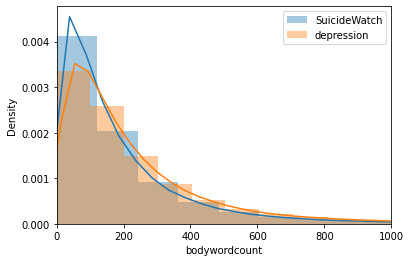

In [69]:
sns.distplot(df.query('label == 1')['bodywordcount'], bins=80, label='SuicideWatch')
sns.distplot(df.query('label == 0')['bodywordcount'], bins=80, label='depression')
plt.legend()
plt.xlim(0, 1000)
plt.show();

#### Keyword Frequencies

Finally, a few readouts of relevant root word frequencies across the two subreddits. As it turns out, the stemmed data and the lemmatized data reflect the same proportions for the root words explored here. As might be expected, `suicid` and `depress` are more common in their "home" subreddits (or the subreddits specifically dedicated to each subject, respectively). Phrases `mental health` and `treatment` are more common in the `depression` subreddit.

In [77]:
print('"suicid" in Lemmatized Text')
print(' ')
print('Number of mentions per 100 SuicideWatch posts: ', round(df.query('label == 1')['unst_simp_lem'].str.count('suicid').mean() * 100, 2))
print('Number of mentions per 100 depression posts: ', round(df.query('label == 0')['unst_simp_lem'].str.count('suicid').mean() * 100, 2))

"suicid" in Lemmatized Text
 
Number of mentions per 100 SuicideWatch posts:  52.01
Number of mentions per 100 depression posts:  23.88


In [78]:
print('"suicid" in Stemmed Text')
print(' ')
print('Number of mentions per 100 SuicideWatch posts: ', round(df.query('label == 1')['unst_simp_stem'].str.count('suicid').mean() * 100, 2))
print('Number of mentions per 100 depression posts: ', round(df.query('label == 0')['unst_simp_stem'].str.count('suicid').mean() * 100, 2))

"suicid" in Stemmed Text
 
Number of mentions per 100 SuicideWatch posts:  52.01
Number of mentions per 100 depression posts:  23.88


In [80]:
print('"depress" in Lemmatized Text')
print(' ')
print('Number of mentions per 100 SuicideWatch posts: ', round(df.query('label == 1')['unst_simp_lem'].str.count('depress').mean() * 100, 2))
print('Number of mentions per 100 depression posts: ', round(df.query('label == 0')['unst_simp_lem'].str.count('depress').mean() * 100, 2))

"depress" in Lemmatized Text
 
Number of mentions per 100 SuicideWatch posts:  36.96
Number of mentions per 100 depression posts:  117.84


In [81]:
print('"depress" in Stemmed Text')
print(' ')
print('Number of mentions per 100 SuicideWatch posts: ', round(df.query('label == 1')['unst_simp_stem'].str.count('depress').mean() * 100, 2))
print('Number of mentions per 100 depression posts: ', round(df.query('label == 0')['unst_simp_stem'].str.count('depress').mean() * 100, 2))

"depress" in Stemmed Text
 
Number of mentions per 100 SuicideWatch posts:  36.96
Number of mentions per 100 depression posts:  117.84


In [82]:
print('"mental health" in Lemmatized Text')
print(' ')
print('Number of mentions per 100 SuicideWatch posts: ', round(df.query('label == 1')['unst_simp_lem'].str.count('mentalhealth').mean() * 100, 2))
print('Number of mentions per 100 depression posts: ', round(df.query('label == 0')['unst_simp_lem'].str.count('mentalhealth').mean() * 100, 2))

"mental health" in Lemmatized Text
 
Number of mentions per 100 SuicideWatch posts:  0.01
Number of mentions per 100 depression posts:  0.03


In [83]:
print('"mental health" in Stemmed Text')
print(' ')
print('Number of mentions per 100 SuicideWatch posts: ', round(df.query('label == 1')['unst_simp_stem'].str.count('mentalhealth').mean() * 100, 2))
print('Number of mentions per 100 depression posts: ', round(df.query('label == 0')['unst_simp_stem'].str.count('mentalhealth').mean() * 100, 2))

"mental health" in Stemmed Text
 
Number of mentions per 100 SuicideWatch posts:  0.01
Number of mentions per 100 depression posts:  0.03


In [84]:
print('"treatment" in Lemmatized Text')
print(' ')
print('Number of mentions per 100 SuicideWatch posts: ', round(df.query('label == 1')['unst_simp_lem'].str.count('treatment').mean() * 100, 2))
print('Number of mentions per 100 depression posts: ', round(df.query('label == 0')['unst_simp_lem'].str.count('treatment').mean() * 100, 2))

"treatment" in Lemmatized Text
 
Number of mentions per 100 SuicideWatch posts:  1.86
Number of mentions per 100 depression posts:  2.84
